<a href="https://colab.research.google.com/github/Gyeong-Hyeon/AI_Project/blob/main/Section4/Facial_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction

##2. Materials & Method

##2-1. Download dataset



*  [Kaggle Facial Expression Recognition(FER)Challenge](https://www.kaggle.com/ashishpatel26/facial-expression-recognitionferchallenge)



In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
ls -1ha kaggle.json

kaggle.json


In [5]:
!kaggle datasets download -d ashishpatel26/facial-expression-recognitionferchallenge

 84% 81.0M/96.6M [00:00<00:00, 101MB/s] 
100% 96.6M/96.6M [00:00<00:00, 132MB/s]


In [6]:
!unzip facial-expression-recognitionferchallenge.zip

Archive:  facial-expression-recognitionferchallenge.zip
  inflating: Submission.csv          
  inflating: fer2013/fer2013/README  
  inflating: fer2013/fer2013/fer2013.bib  
  inflating: fer2013/fer2013/fer2013.csv  


##2-2. Preprocessing

Importing the required packages for this project

In [9]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Checking the datatset

In [28]:
df = pd.read_csv('./fer2013/fer2013/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [14]:
math.sqrt(len(df.pixels[0].split(' ')))

48.0

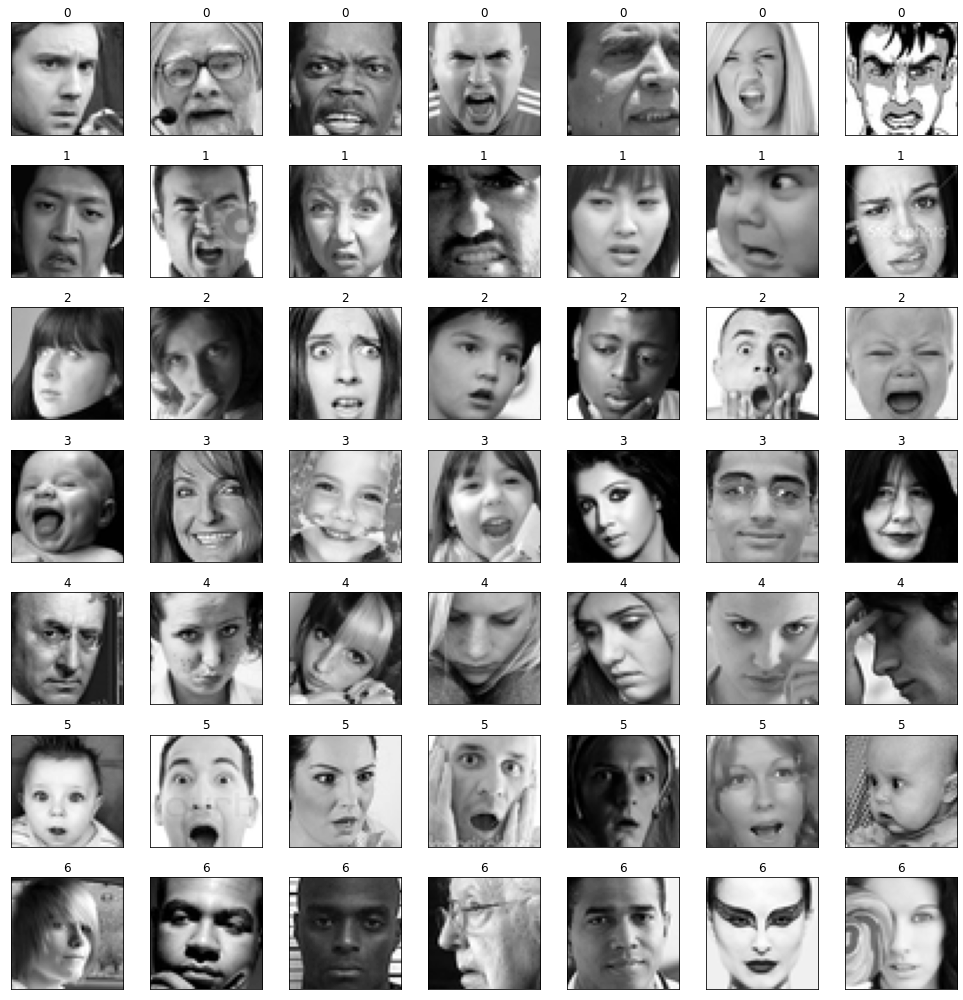

In [19]:
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label)
        pyplot.tight_layout()

 check y labels

In [13]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

Y labels can be interpreted as below:
*   0 & 1: Angry/ Annoyed
*   3: Happy
*   4: Sad
*   2 & 5: Surprised
*   6: neutral

But I can see some photos are wrongly labelled. So let's look the dataset closer.



In [29]:
data = df.copy()
df.emotion = df.emotion.replace(1,0) #combine label 1&0
df.emotion = df.emotion.replace(2,5) #combine label 2&5
df.emotion.unique()

array([0, 5, 4, 6, 3])

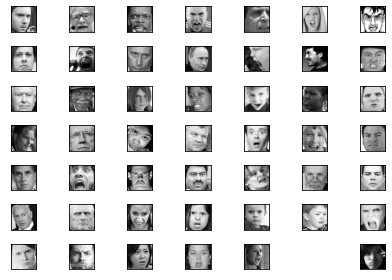

In [33]:
k=0
for j in range(49):
  px = df[df.emotion==0].pixels.iloc[k]
  px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

  k += 1
  ax = pyplot.subplot(7, 7, k)
  ax.imshow(px, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  pyplot.tight_layout()

#3. Results